# The Spark Foundation
## Data Science and Business Analytics Internship
## Task(1) : Prediction using Supervised ML

### Problem: Predict the percentage of a student based on the number of study hours.
###                  What will be the predicted score if a student studies for 9.25 hrs/day?
### Dataset : http://bit.ly/w-data

### 1- Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

### 2- Read The Data

In [6]:
path = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(path)

In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 3- Data Cleaning

In [16]:
df.isnull().values.any()

False

In [17]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 4- Visualization

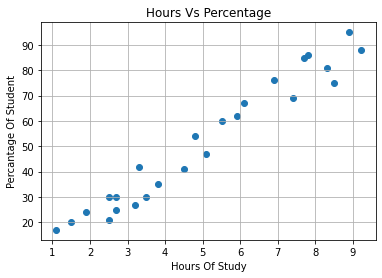

In [14]:
#Plot the Graph for Data

plt.scatter(x=df.Hours, y=df.Scores)
plt.xlabel("Hours Of Study")
plt.ylabel("Percantage Of Student")
plt.title("Hours Vs Percentage")
plt.grid()
plt.show()

### 5- Define Variables

In [20]:
x = df.drop("Scores", axis = "columns") 
y = df.drop("Hours", axis = "columns") 

print("Shape of x", x.shape)
print("Shape of y", y.shape)

Shape of x (25, 1)
Shape of y (25, 1)


In [21]:
x = df['Hours']
y = df['Scores']

x = x.values.reshape(len(x), 1)
y = y.values.reshape(len(y), 1)

### 6- Train & Test Algorithm

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 100)

### 7- Linear Regression Model 

In [94]:
LR = LinearRegression()

In [95]:
LR.fit(x_train, y_train)

LinearRegression()

In [96]:
LR.coef_

array([[10.04767782]])

In [97]:
LR.intercept_ 

array([0.88720685])

In [98]:
#Plot the regression line on the graph
# Line Formula : y = m * x +c

line = LR.coef_ * x_train + LR.intercept_

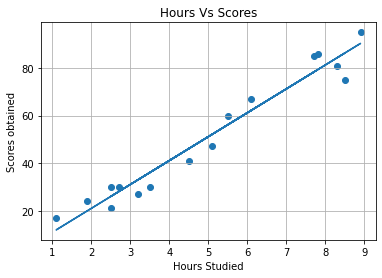

In [99]:
#Scatter Plot with regression line

plt.scatter(x_train, y_train)
plt.plot(x_train, line)
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

### 8- Prediction

In [100]:
pre = LR.predict(x_test) 

In [101]:
pd.DataFrame(np.c_[x_test, y_test, pre], columns = ["Hours", "Scores", "Predicted_Score"])

,Hours,Scores,Predicted_Score
0,2.7,25.0,28.015937
1,3.8,35.0,39.068383
2,3.3,42.0,34.044544
3,5.9,62.0,60.168506
4,1.5,20.0,15.958724
5,7.4,69.0,75.240023
6,6.9,76.0,70.216184
7,4.8,54.0,49.116060
8,9.2,88.0,93.325843


### 9- Accuracy

In [102]:
LR.score(x_test, y_test)

0.9470651238166582

In [103]:
mean_squared_error(y_test, pre, squared = True)

25.914562718200436

In [104]:
mean_squared_error(y_test, pre, squared = False)

5.09063480503173

### 10- What will be the predicted score if a student studies for 9.25 hrs/day?

In [105]:
Hours = [9.25]
Own_pre = LR.predict([Hours])

print("Number of Hours = {}".format([Hours]))
print("Predicted Scores = {}".format(Own_pre[0]))

Number of Hours = [[9.25]]
Predicted Scores = [93.82822672]
